# Part II - Trip data characteristics on duration
## by Yelena N

## Dataset Overview

> In this investigation, I wanted to look at the characteristics of trip data that could be used to predict their duration. The main focus was on the five: age,user type, and gender.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# change the data type for start and end time to be datetime64[ns] 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

## Distribution of Trip Durations

>Trip Durations in the dataset take on a very large range of values. Number of Trips values first increases starting from around 8000 values to 12500 values at peak around 600 seconds but then starts to fall below at 2000 values.

(0, 5000)

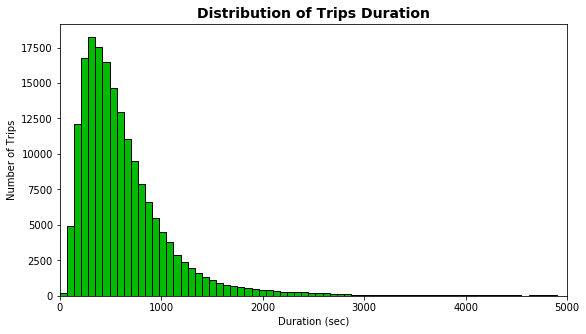

In [5]:
#what is the distribution of trip duration
plt.figure(figsize=[20,5]);
plt.subplot(1,2,1);
bins=np.arange(0, df['duration_sec'].max()+70, 70)
plt.hist(data= df, x='duration_sec',color = '#00BB00', bins = bins, edgecolor = 'black', linewidth = 1);
plt.xlabel('Duration (sec)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips Duration', fontsize=14, fontweight='bold');
plt.xlim(0, 5000)

## Distribution of User Age


> In the case of age, you can see that the distribution is more concentrated between 20 to 40 years old.

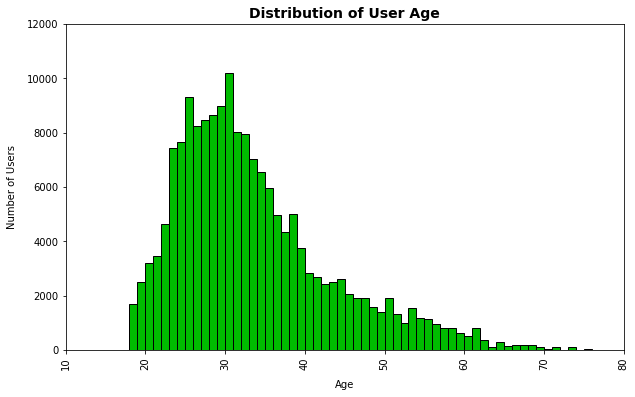

In [6]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df.dropna(), x = 'member_birth_year', color = '#00BB00', bins = bins, edgecolor = 'black', linewidth = 1)
plt.axis([1939, 2009, 0, 12000])
plt.xticks(range(1939, 2010, 10), [(2019-year) for year in range(1939, 2010, 10)], rotation=90)
plt.gca().invert_xaxis()
plt.title('Distribution of User Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', labelpad=10)
plt.ylabel('Number of Users', labelpad=10)
plt.show()

## Trip Duration vs. Age

>By looking at the chart below, we can see that most frequent users aged between 20 and 45. As remark, duration is registered by younger members.

Text(0,0.5,'Duaration_sec')

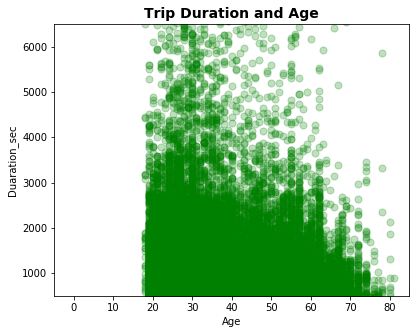

In [7]:
plt.figure(figsize=[14,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, s = 200, marker = '.', color = 'green' )
plt.axis([-5, 85, 500, 6500])
plt.title('Trip Duration and Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Duaration_sec')

# Trip Duration and Age by Gender
>The main thing I want to explore in this part of the analysis is how the three categorical measures of gender into the relationship between trip duration and age.

For the age, duration, and gender, for the others leap at an older age (around 60 years) to got 3000 trip duration.

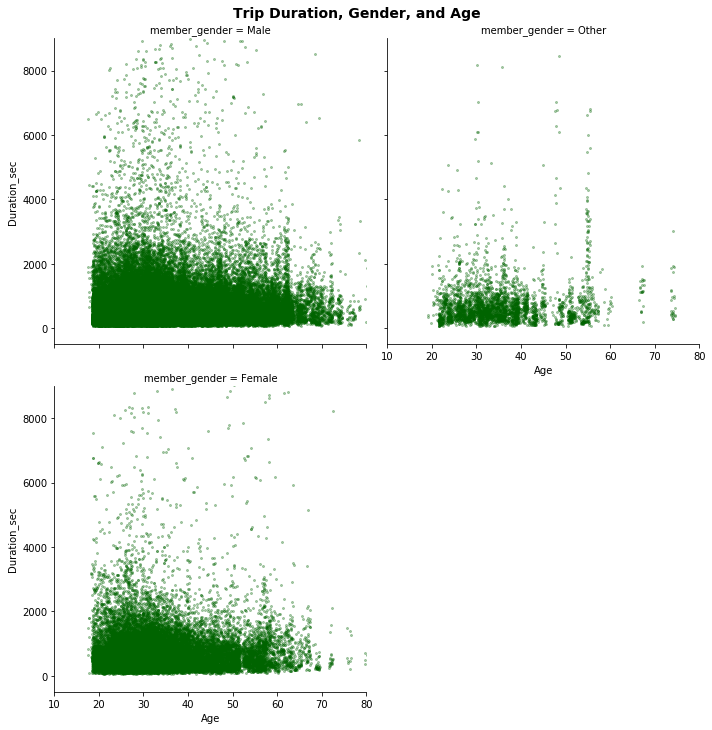

In [8]:
# Add jitter to the data points
jitter = np.random.uniform(-0.5, 0.5, size=df.shape[0])
df['age'] = (2019 - df['member_birth_year']) + jitter

# Create the plot
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha= 0.3, s = 4, color = 'darkgreen')

# Add titles and labels
gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration, Gender, and Age', y=1.01,fontsize=14, fontweight='bold')

# Show the plot
plt.show()

# Trip Duration and Age by User Type
>The main thing I want to explore in this part of the analysis is how the three categorical measures of user type into the relationship between trip duration and age.

For the age, duration, and user type, both Customer and Subscriber are showing similar trends for age and trip duration, but for subscribers the trip duration is higher for older age.

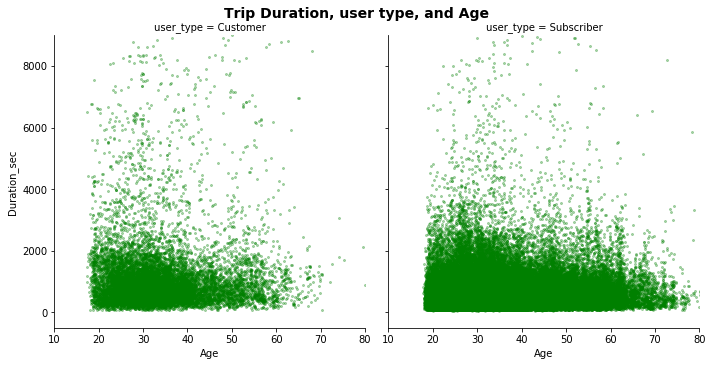

In [9]:
# Add random noise to the age column
df['age_jittered'] = df['age'] + np.random.rand(len(df)) - 0.5

# Create the plot using the jittered age column
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_type.map(plt.scatter, 'age_jittered', 'duration_sec', alpha= 0.3, s = 4, color = 'green')

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
user_type.fig.suptitle('Trip Duration, user type, and Age',y=1.01, fontsize=14, fontweight='bold')
plt.show()

### Let's look at the bar chart of the Percentage of all bike rides per gender

In [10]:
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

In [11]:
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

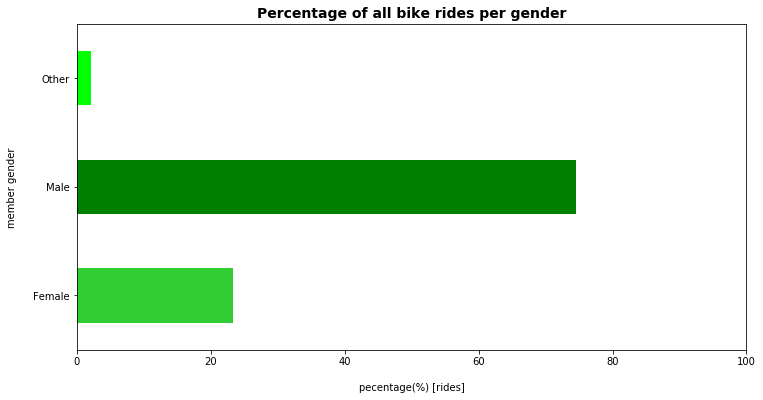

In [12]:
new_color = ['limegreen', 'green', 'lime']
trip_by_gender_df['perc'].plot(kind='barh', color=new_color, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=14, fontweight='bold')
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)
plt.savefig('image03.png');

#### Male took 76% of all bike rides, and female took 22% of them

## User type, gender and age relationship

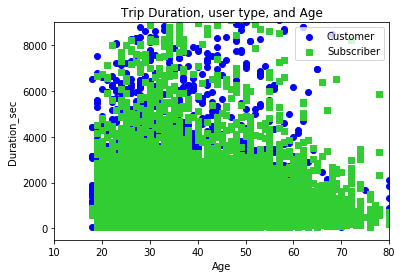

In [13]:
usertype_mark = [['Customer', 'o', 'blue'],['Subscriber', 's', 'limegreen']]

for utype, marker, color in usertype_mark:
    df_utype = df[df['user_type'] == utype]
    plt.scatter((2019 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha= 1, color=color)
plt.legend(['Customer','Subscriber'])
plt.axis([10, 80, -500, 9000 ])
plt.title('Trip Duration, user type, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [16]:
from IPython.display import HTML

HTML('''
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);

''')

In [20]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_gobike.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_gobike.ipynb to slides
[NbConvertApp] Writing 738121 bytes to Part_II_gobike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbc

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
